In [4]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'March')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'March')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [6]:
def names(Name,title,size,w):
    namevalues = list(map(str, data[Name].value_counts().keys().tolist()))
    namecounts = list(map(int, data[Name].value_counts().tolist()))
    crimename = pd.DataFrame({'Type':namevalues,'repeat':namecounts})
    namebar = (crimename).sort_values(['repeat'])
    ax = namebar.plot(x = 'Type', y = 'repeat', kind = 'barh', figsize = size,title = title,legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))

# Count of crime based on name

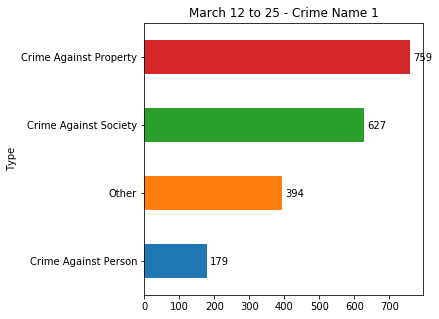

In [7]:
names("Crime Name1", "March 12 to 25 - Crime Name 1",(5,5),10)

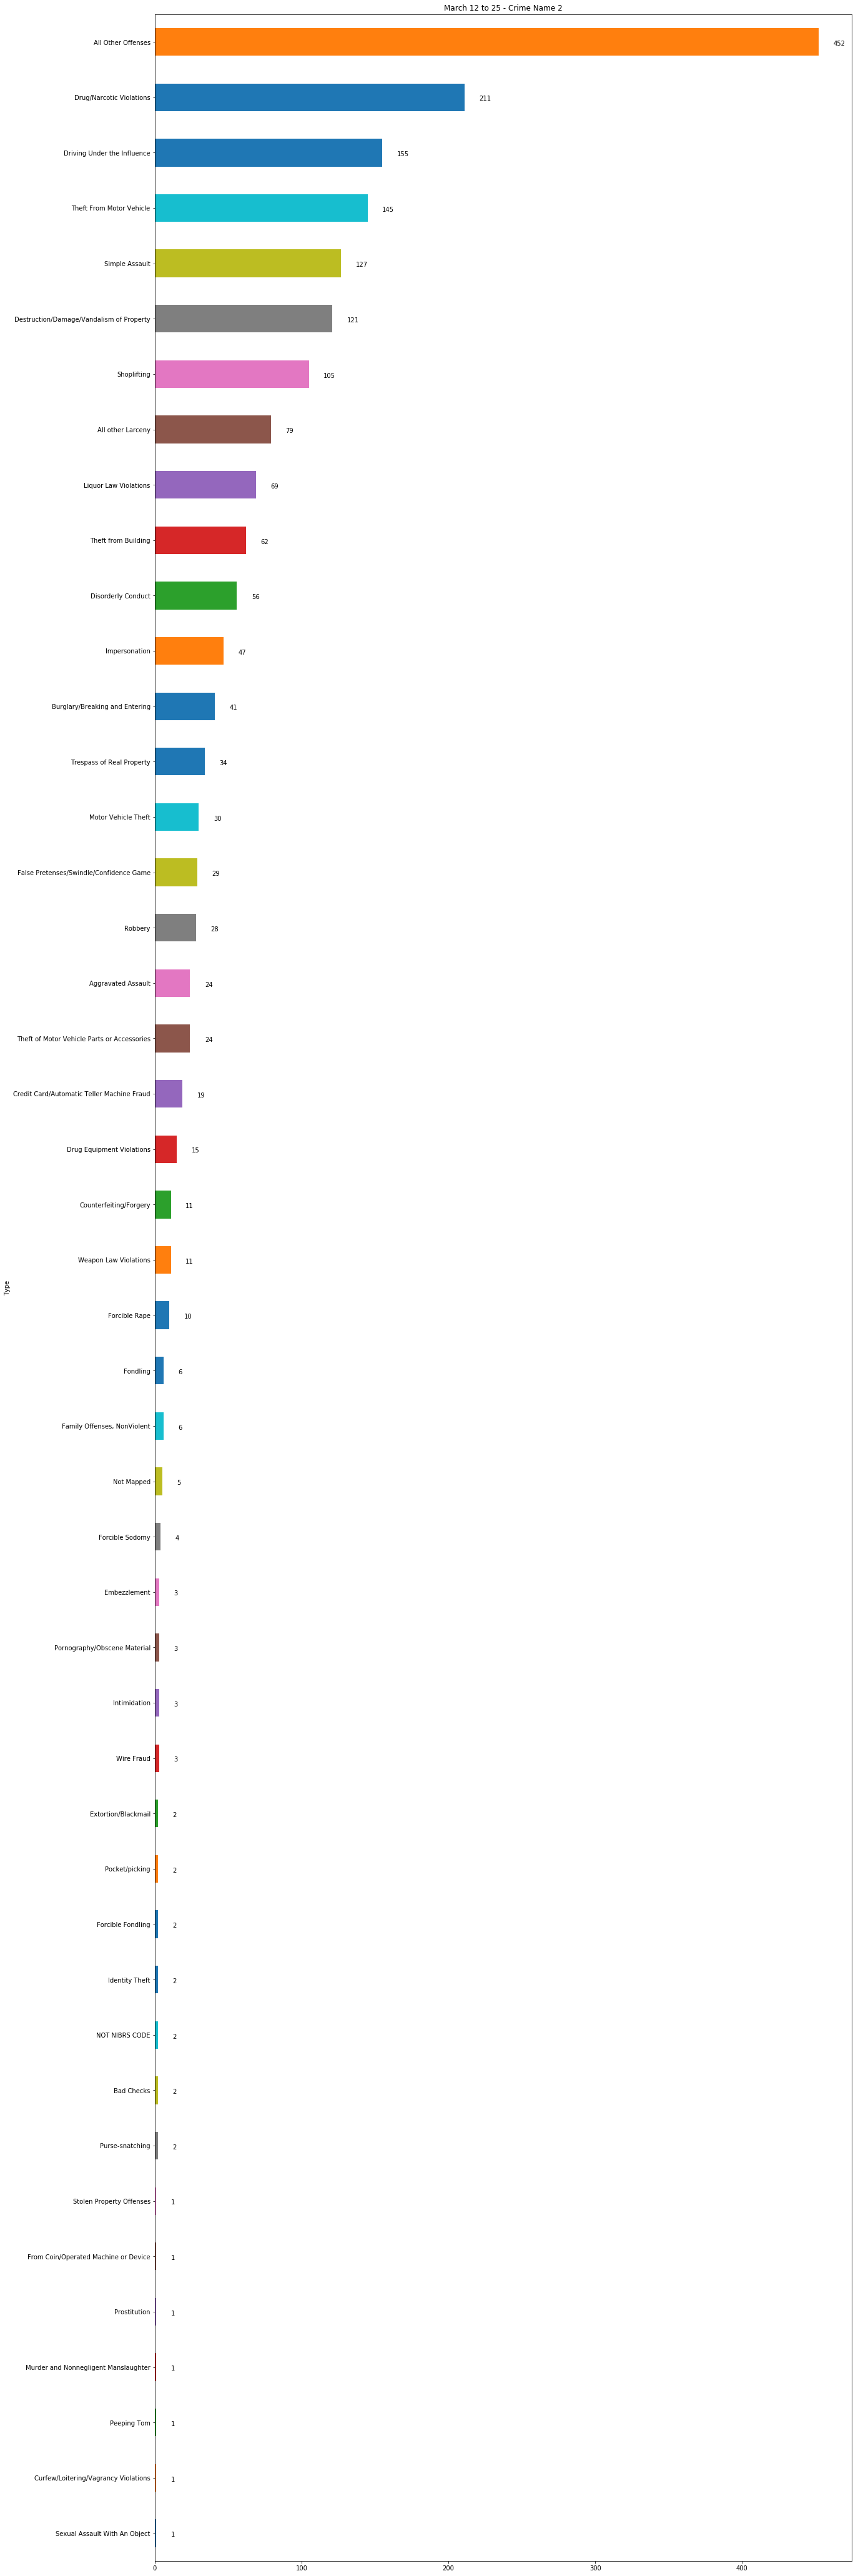

In [8]:
names("Crime Name2", "March 12 to 25 - Crime Name 2",(20,75),10)

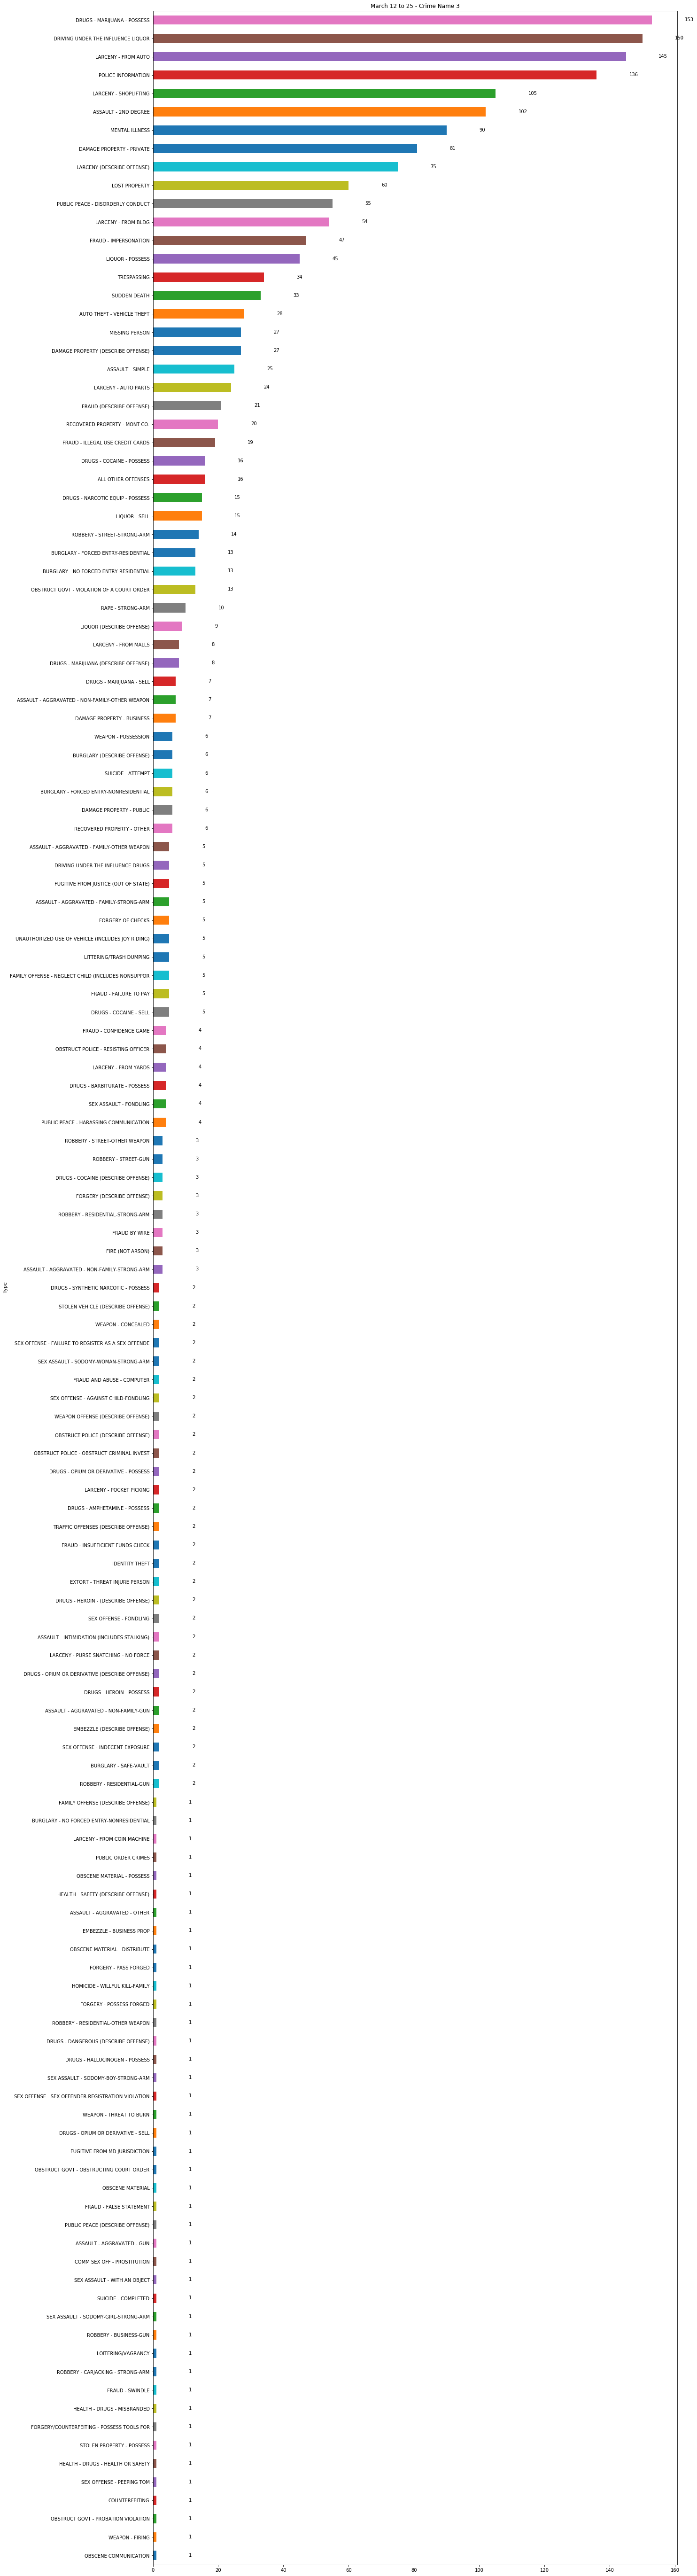

In [9]:
names("Crime Name3", "March 12 to 25 - Crime Name 3",(20,100),10)

In [10]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

# Count of crime based on weekday

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

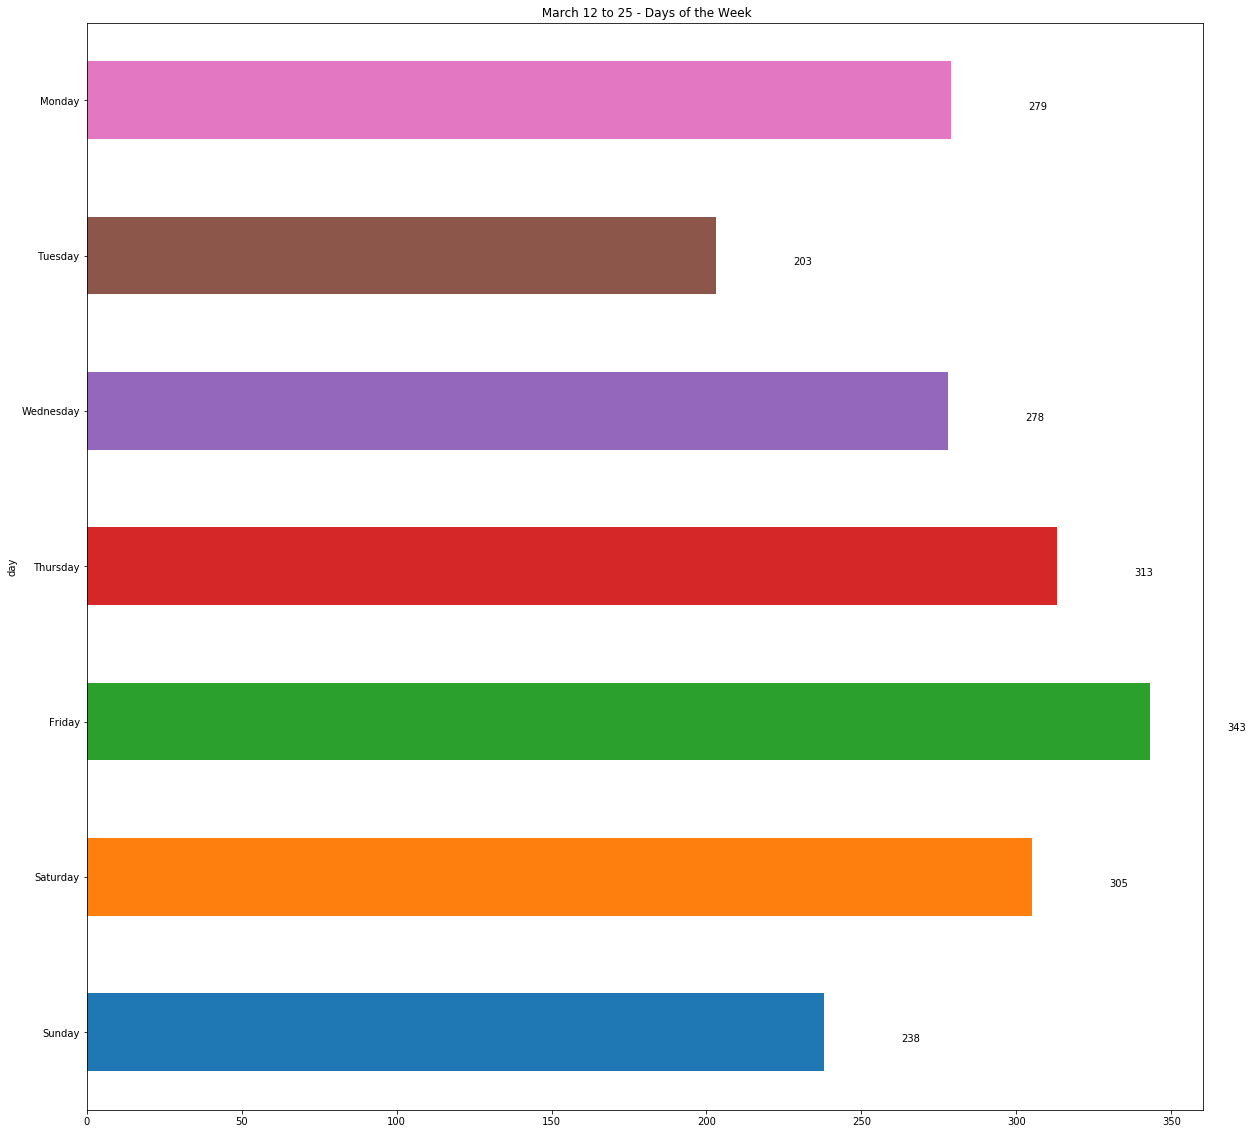

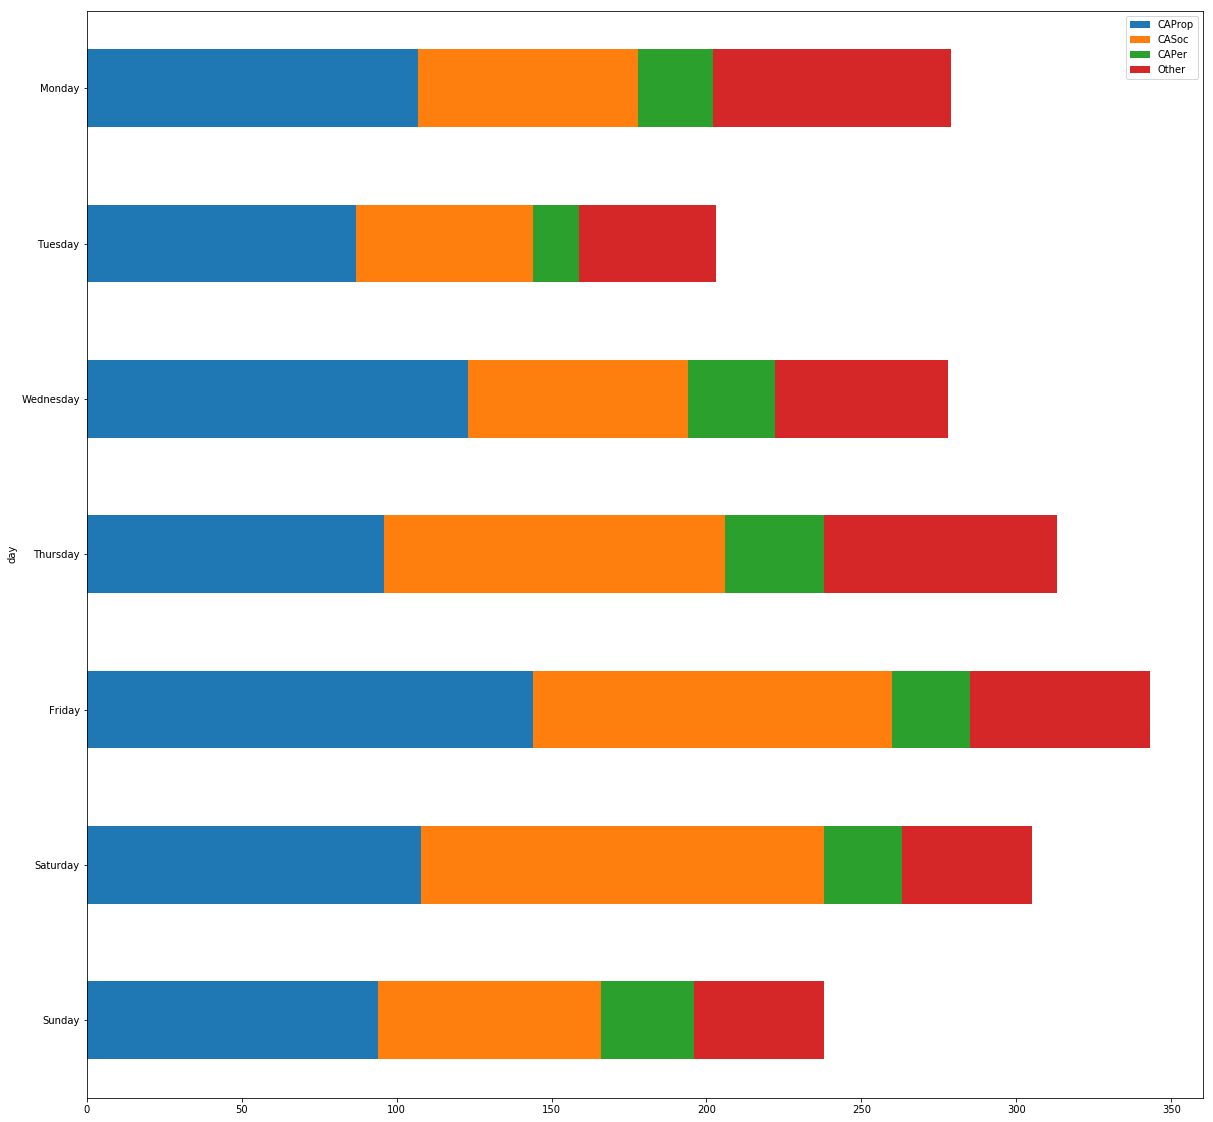

In [11]:
weekandcount(data,25," March 12 to 25 - Days of the Week")

In [12]:
def dayandcount(data,w):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    ughh = []
    ughhh = []
    #datevalues.append("03-17")
    #datecounts.append(0)
    date = pd.DataFrame({'Date':datevalues,'count':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date'])
    bruh = [0]*14
    bruh1 = [0]*14
    bruh2 = [0]*14
    bruh3 = [0]*14
    ugh = []
    datevalues.sort()
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh1[datevalues.index(row['Start Date'])] +=1
            #print(row['Start Date'],datevalues.index(row['Start Date']),row["Crime Name1"])
            #print(bruh1)
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh2[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh3[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[datevalues.index(row['Start Date'])] +=1
    date["Crime Against Property"] = bruh
    date["Crime Against Society"] = bruh1
    date["Crime Against Person"] = bruh2
    date["Other"] = bruh3
    #date = date.drop([0],axis = 0)
    #date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'count', kind = 'bar', figsize = (20,20),title = "March 12 to 25 - Daily", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_y()))
    ugh = date["count"]
    date = date.drop(["count"],axis = 1)
    ax = date.plot.bar(figsize = (20,20),stacked = True,x = 'Date')
    date["count"] = ugh
    return date, datevalues

# Crime by Date

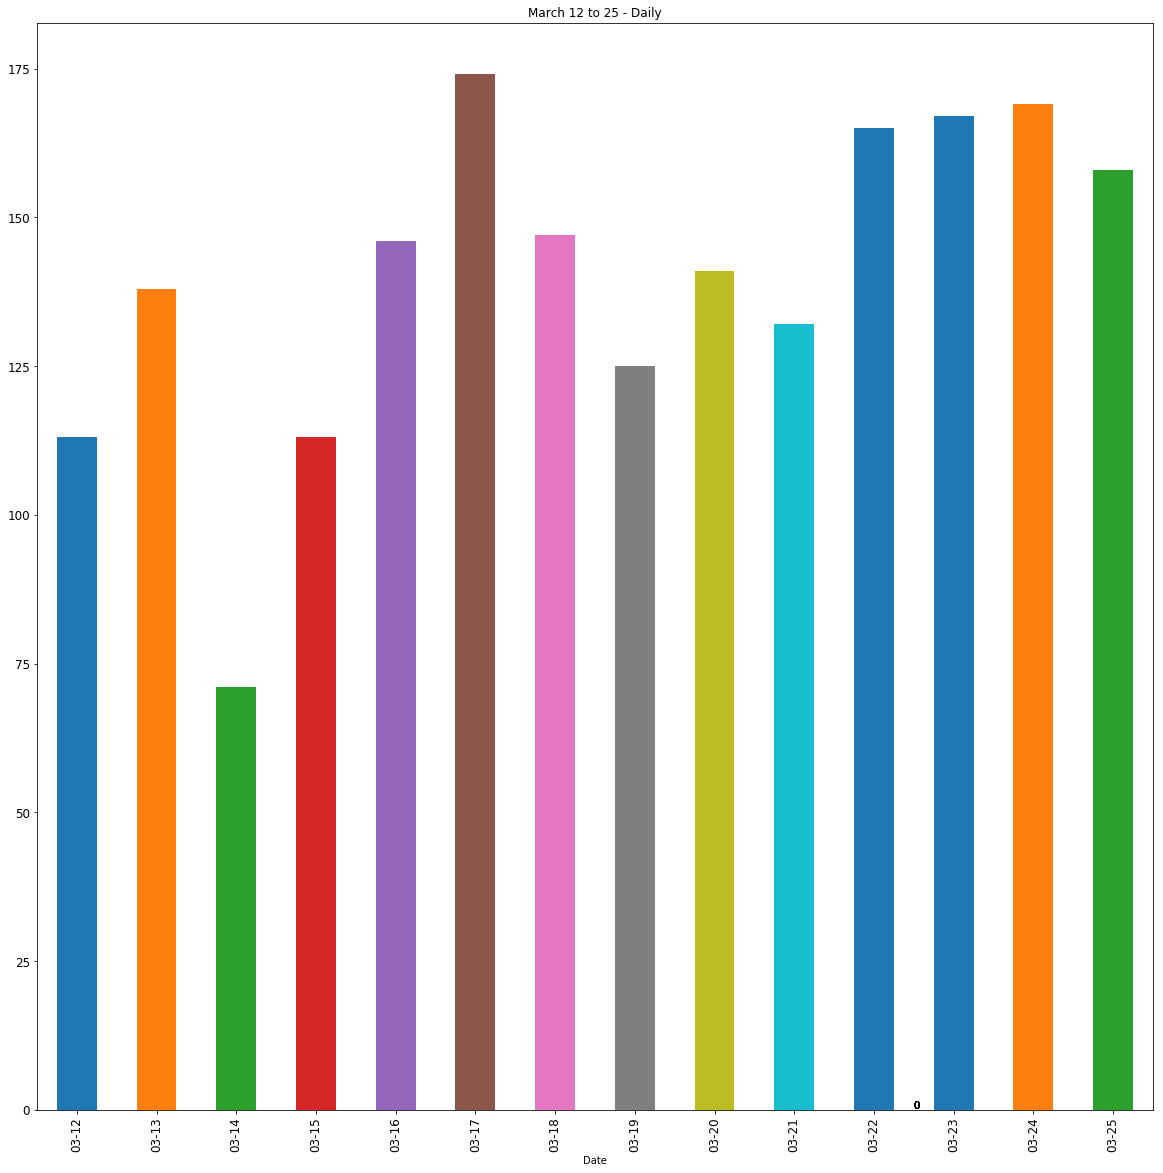

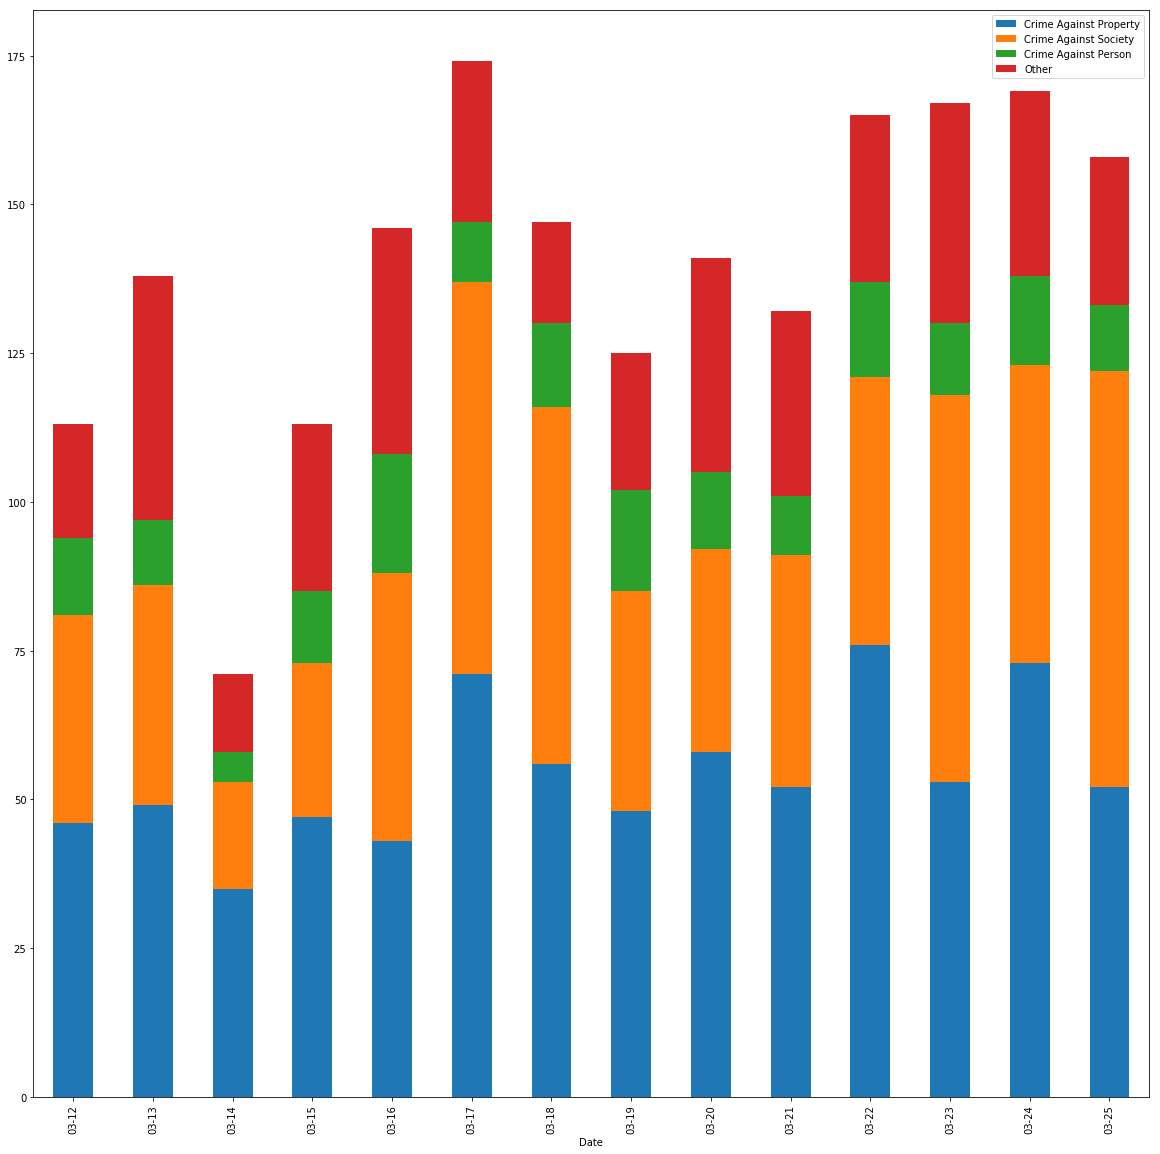

In [13]:
date,datevalues = dayandcount(data,10)

# Crime by hour

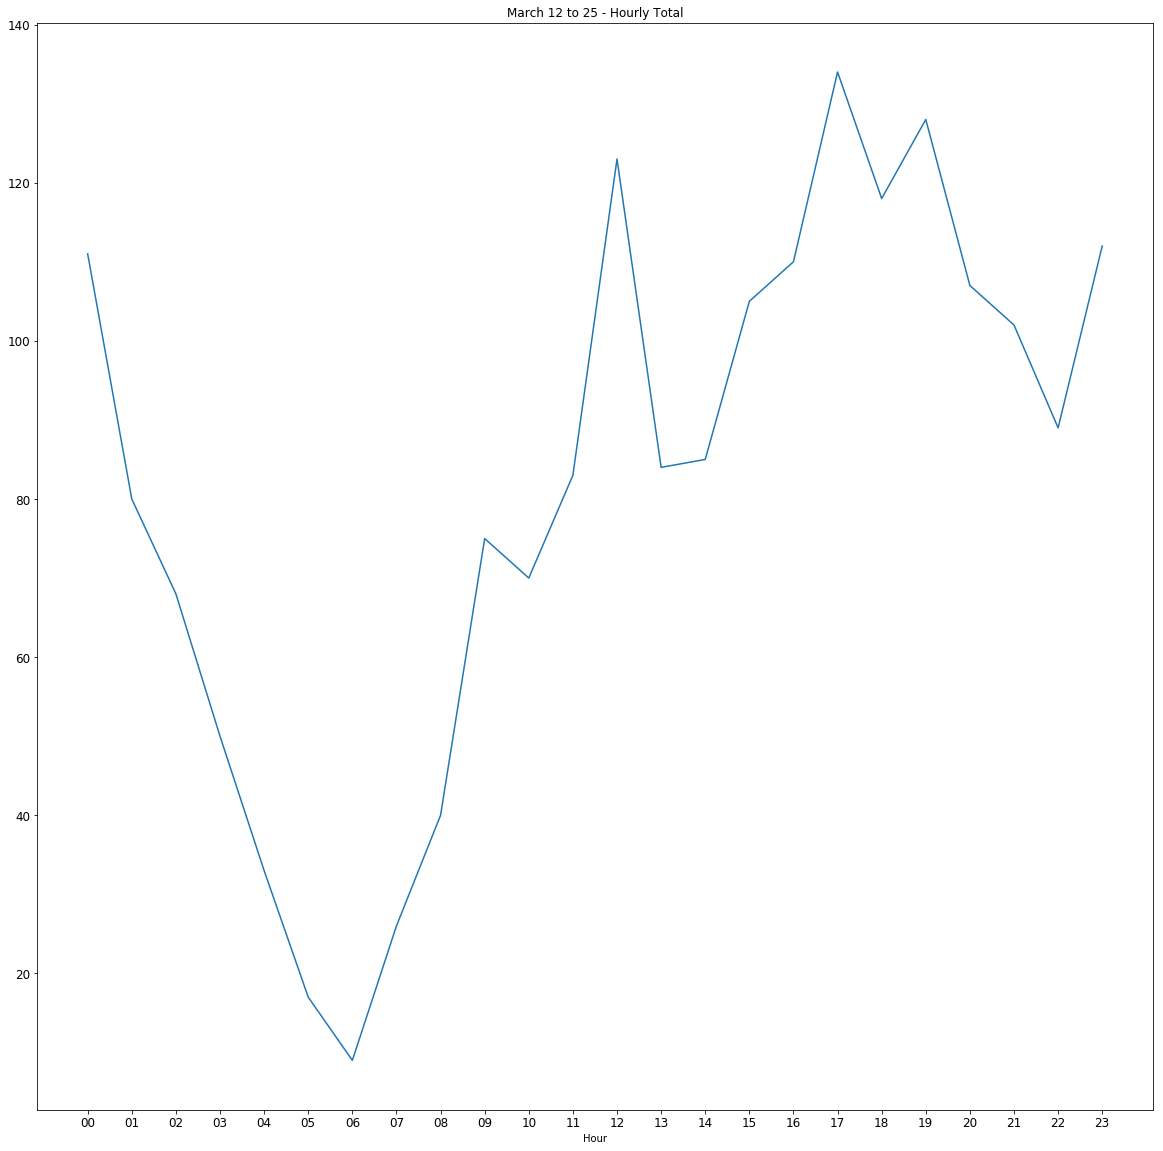

In [14]:
hourvalues = list(map(str, data['Start Time'].value_counts().keys().tolist()))
hourcounts = list(map(int, data['Start Time'].value_counts().tolist()))
ughh = []
ughhh = []
hour = pd.DataFrame({'Hour':hourvalues,'count':hourcounts})
hourbar = hour.sort_values(['Hour'])
#hourbar = hourbar.drop([24],axis = 0)
ax = hourbar.plot(x = 'Hour', y = 'count', kind = 'line', figsize = (20,20),title = 'March 12 to 25 - Hourly Total', legend = False, fontsize = 12,xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [15]:
print(date)

     Date month day  Crime Against Property  Crime Against Society  \
12  03-12    03  12                      46                     35   
8   03-13    03  13                      49                     37   
13  03-14    03  14                      35                     18   
11  03-15    03  15                      47                     26   
6   03-16    03  16                      43                     45   
0   03-17    03  17                      71                     66   
5   03-18    03  18                      56                     60   
10  03-19    03  19                      48                     37   
7   03-20    03  20                      58                     34   
9   03-21    03  21                      52                     39   
3   03-22    03  22                      76                     45   
2   03-23    03  23                      53                     65   
1   03-24    03  24                      73                     50   
4   03-25    03  25 

In [16]:
ugh = [0]*(336)
ughh = []
i = -1
j = 0
data = data.sort_values("Start Date/Time")
for d in datevalues:
    i = datevalues.index(d)
    for index,row in data.iterrows():
        if d == row["Start Date"]:
            j = int(row["Start Time"])
            ugh[(14*j)+i] += 1
dateandtime = []
for i in range (0, 24):
    for d in datevalues:
        dateandtime.append(d + " " +str(i))
print(dateandtime)
time0 = dateandtime[0:14]
time1 = dateandtime[14:28]
time2 = dateandtime[28:42]
time3 = dateandtime[42:56]
time4 = dateandtime[56:70]
time5 = dateandtime[70:84]
time6 = dateandtime[84:98]
time7 = dateandtime[98:112]
time8 = dateandtime[112:126]
time9 = dateandtime[126:140]
time10 = dateandtime[140:154]
time11 = dateandtime[154:168]
time12 = dateandtime[168:182]
time13 = dateandtime[182:196]
time14 = dateandtime[196:210]
time15 = dateandtime[210:224]
time16 = dateandtime[224:238]
time17 = dateandtime[238:252]
time18 = dateandtime[252:266]
time19 = dateandtime[266:280]
time20 = dateandtime[280:294]
time21 = dateandtime[294:308]
time22 = dateandtime[308:322]
time23 = dateandtime[322:336]
dateandtime = []
for i in range(0,14):
    dateandtime.append(time0[i])
    dateandtime.append(time1[i])
    dateandtime.append(time2[i])
    dateandtime.append(time3[i])
    dateandtime.append(time4[i])
    dateandtime.append(time5[i])
    dateandtime.append(time6[i])
    dateandtime.append(time7[i])
    dateandtime.append(time8[i])
    dateandtime.append(time9[i])
    dateandtime.append(time10[i])
    dateandtime.append(time11[i])
    dateandtime.append(time12[i])
    dateandtime.append(time13[i])
    dateandtime.append(time14[i])
    dateandtime.append(time15[i])
    dateandtime.append(time16[i])
    dateandtime.append(time17[i])
    dateandtime.append(time18[i])
    dateandtime.append(time19[i])
    dateandtime.append(time20[i])
    dateandtime.append(time21[i])
    dateandtime.append(time22[i])
    dateandtime.append(time23[i])
print(dateandtime)
time_0 = ugh[0:14]
time_1 = ugh[14:28]
time_2 = ugh[28:42]
time_3 = ugh[42:56]
time_4 = ugh[56:70]
time_5 = ugh[70:84]
time_6 = ugh[84:98]
time_7 = ugh[98:112]
time_8 = ugh[112:126]
time_9 = ugh[126:140]
time_10 = ugh[140:154]
time_11 = ugh[154:168]
time_12 = ugh[168:182]
time_13 = ugh[182:196]
time_14 = ugh[196:210]
time_15 = ugh[210:224]
time_16 = ugh[224:238]
time_17 = ugh[238:252]
time_18 = ugh[252:266]
time_19 = ugh[266:280]
time_20 = ugh[280:294]
time_21 = ugh[294:308]
time_22 = ugh[308:322]
time_23 = ugh[322:336]
ugh = []
for i in range(0,14):
    ugh.append(time_0[i])
    ugh.append(time_1[i])
    ugh.append(time_2[i])
    ugh.append(time_3[i])
    ugh.append(time_4[i])
    ugh.append(time_5[i])
    ugh.append(time_6[i])
    ugh.append(time_7[i])
    ugh.append(time_8[i])
    ugh.append(time_9[i])
    ugh.append(time_10[i])
    ugh.append(time_11[i])
    ugh.append(time_12[i])
    ugh.append(time_13[i])
    ugh.append(time_14[i])
    ugh.append(time_15[i])
    ugh.append(time_16[i])
    ugh.append(time_17[i])
    ugh.append(time_18[i])
    ugh.append(time_19[i])
    ugh.append(time_20[i])
    ugh.append(time_21[i])
    ugh.append(time_22[i])
    ugh.append(time_23[i])
print(ugh)

['03-12 0', '03-13 0', '03-14 0', '03-15 0', '03-16 0', '03-17 0', '03-18 0', '03-19 0', '03-20 0', '03-21 0', '03-22 0', '03-23 0', '03-24 0', '03-25 0', '03-12 1', '03-13 1', '03-14 1', '03-15 1', '03-16 1', '03-17 1', '03-18 1', '03-19 1', '03-20 1', '03-21 1', '03-22 1', '03-23 1', '03-24 1', '03-25 1', '03-12 2', '03-13 2', '03-14 2', '03-15 2', '03-16 2', '03-17 2', '03-18 2', '03-19 2', '03-20 2', '03-21 2', '03-22 2', '03-23 2', '03-24 2', '03-25 2', '03-12 3', '03-13 3', '03-14 3', '03-15 3', '03-16 3', '03-17 3', '03-18 3', '03-19 3', '03-20 3', '03-21 3', '03-22 3', '03-23 3', '03-24 3', '03-25 3', '03-12 4', '03-13 4', '03-14 4', '03-15 4', '03-16 4', '03-17 4', '03-18 4', '03-19 4', '03-20 4', '03-21 4', '03-22 4', '03-23 4', '03-24 4', '03-25 4', '03-12 5', '03-13 5', '03-14 5', '03-15 5', '03-16 5', '03-17 5', '03-18 5', '03-19 5', '03-20 5', '03-21 5', '03-22 5', '03-23 5', '03-24 5', '03-25 5', '03-12 6', '03-13 6', '03-14 6', '03-15 6', '03-16 6', '03-17 6', '03-18 6'

In [17]:
print(len(ugh))

336


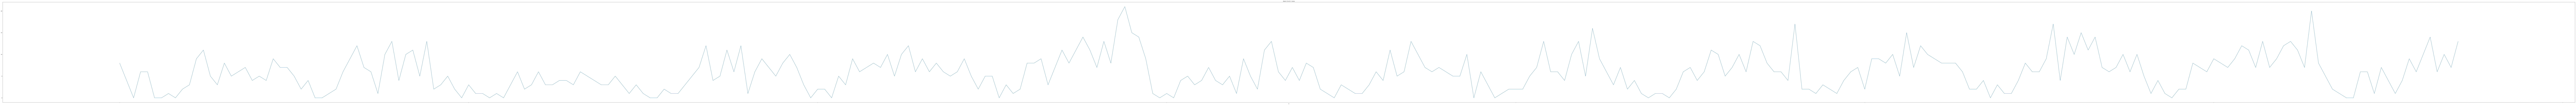

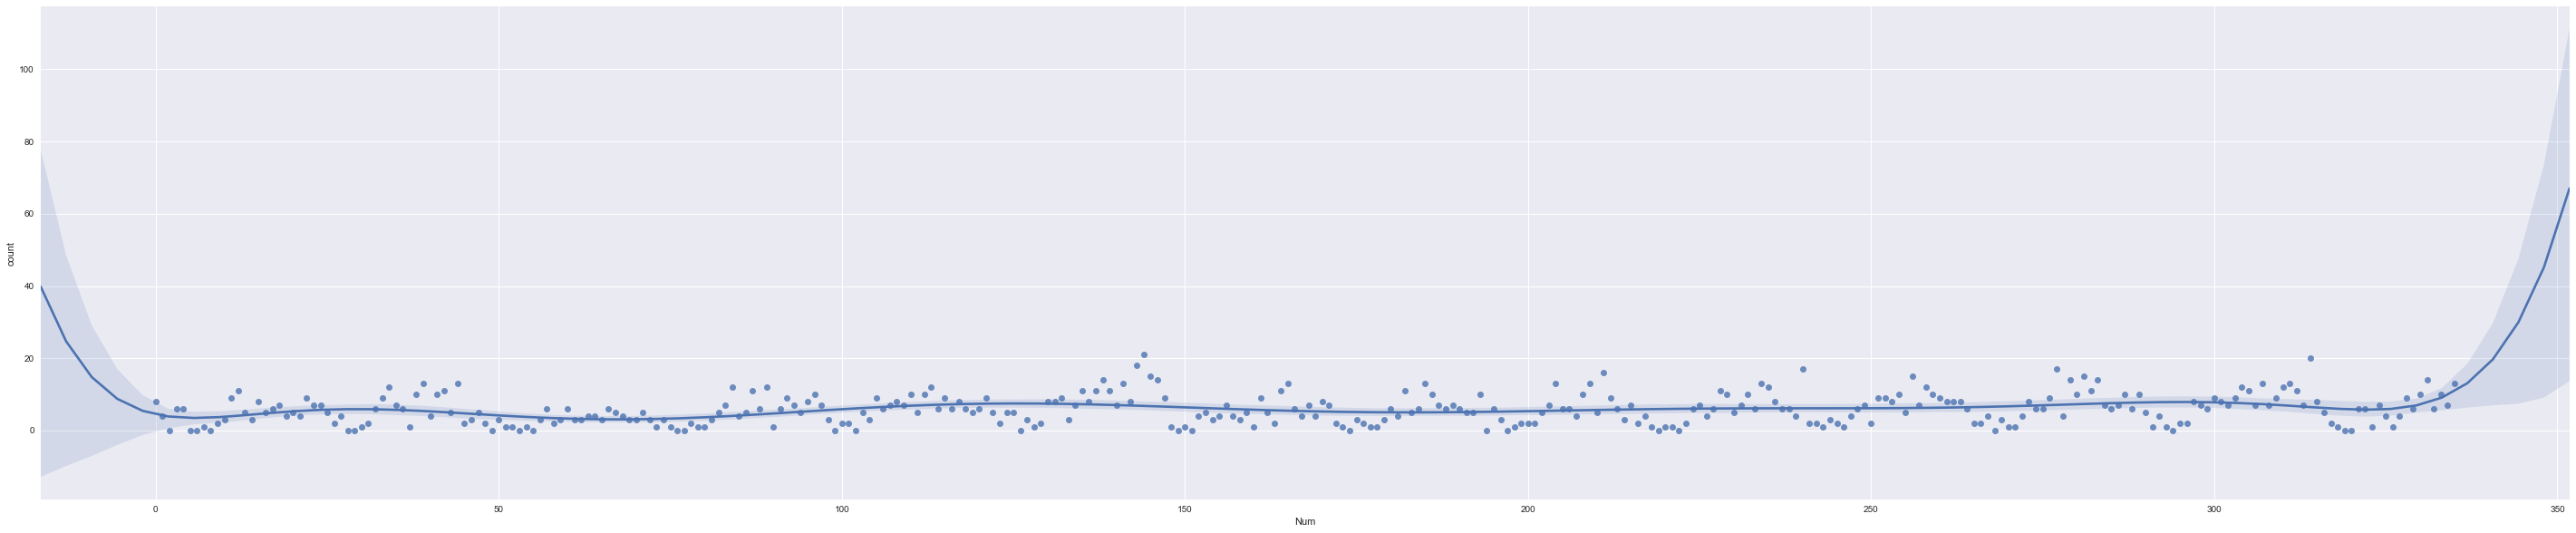

In [18]:
hourbyhour = pd.DataFrame({'dt': dateandtime,'count':ugh })
#hourbyhour = hourbyhour.sort_values('dt')
#hourbar = hourbar.drop([24],axis = 0)
ax = hourbyhour.plot(x = 'dt', y = 'count', kind = 'line', figsize = (500,20),title = 'March 12 to 25 - Hourly', legend = False, fontsize = 12)
fig = ax.get_figure()
fig.savefig("output.png")
import seaborn as sns; sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(50,10))
hourbyhour["Num"] = [i for i in range(0,336)]
ax = sns.regplot(x = "Num" ,y="count", data=hourbyhour,order = 10)

# Hourly by day followed by avg and std

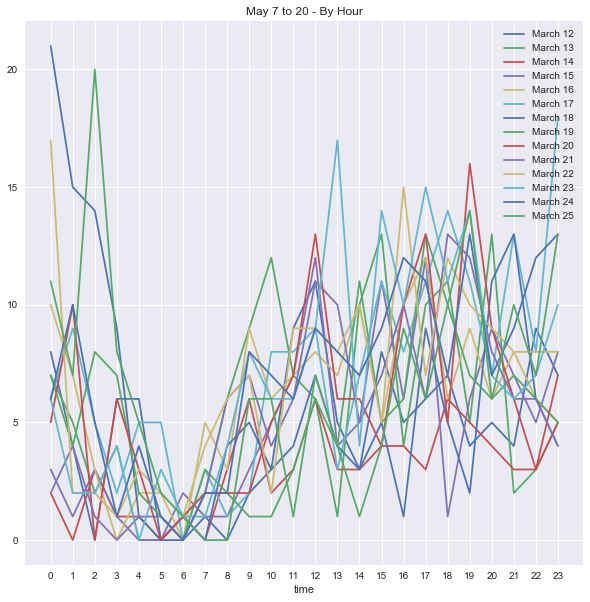

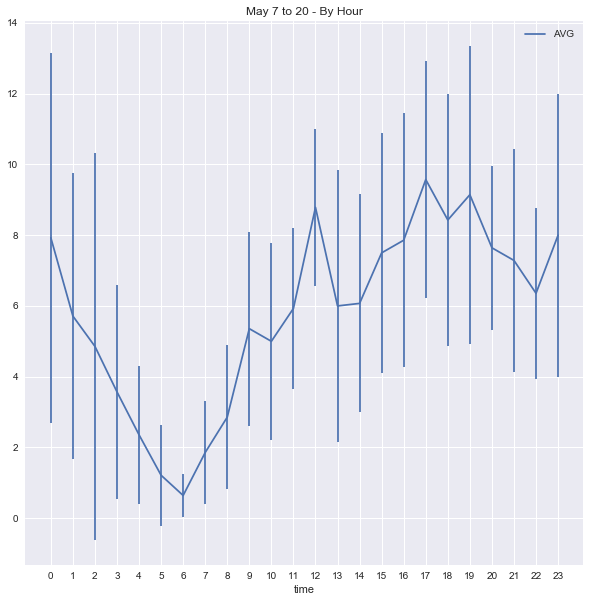

In [19]:
hour = pd.DataFrame({"time" :[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],"March 12": ugh[0:24],
                     "March 13": ugh[24:48] ,
                     "March 14": ugh[48:72], 
                     "March 15": ugh[72:96],
                     "March 16": ugh[96:120],
                     "March 17": ugh[120:144],
                     "March 18": ugh[144:168],
                     "March 19": ugh[168:192],
                     "March 20": ugh[192:216], 
                     "March 21": ugh[216:240],
                     "March 22": ugh[240:264],
                     "March 23": ugh[264:288],
                     "March 24": ugh[288:312],
                     "March 25": ugh[312:336]})
ax = hour.plot(x = "time", xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], kind = "line", figsize = (10,10), title = 'May 7 to 20 - By Hour', legend = True)
ughh = []
ughh.append(np.mean(time_0))
ughh.append(np.mean(time_1))
ughh.append(np.mean(time_2))
ughh.append(np.mean(time_3))
ughh.append(np.mean(time_4))
ughh.append(np.mean(time_5))
ughh.append(np.mean(time_6))
ughh.append(np.mean(time_7))
ughh.append(np.mean(time_8))
ughh.append(np.mean(time_9))
ughh.append(np.mean(time_10))
ughh.append(np.mean(time_11))
ughh.append(np.mean(time_12))
ughh.append(np.mean(time_13))
ughh.append(np.mean(time_14))
ughh.append(np.mean(time_15))
ughh.append(np.mean(time_16))
ughh.append(np.mean(time_17))
ughh.append(np.mean(time_18))
ughh.append(np.mean(time_19))
ughh.append(np.mean(time_20))
ughh.append(np.mean(time_21))
ughh.append(np.mean(time_22))
ughh.append(np.mean(time_23))
hour["AVG"] = ughh

ughh = []
ughh.append(np.std(time_0))
ughh.append(np.std(time_1))
ughh.append(np.std(time_2))
ughh.append(np.std(time_3))
ughh.append(np.std(time_4))
ughh.append(np.std(time_5))
ughh.append(np.std(time_6))
ughh.append(np.std(time_7))
ughh.append(np.std(time_8))
ughh.append(np.std(time_9))
ughh.append(np.std(time_10))
ughh.append(np.std(time_11))
ughh.append(np.std(time_12))
ughh.append(np.std(time_13))
ughh.append(np.std(time_14))
ughh.append(np.std(time_15))
ughh.append(np.std(time_16))
ughh.append(np.std(time_17))
ughh.append(np.std(time_18))
ughh.append(np.std(time_19))
ughh.append(np.std(time_20))
ughh.append(np.std(time_21))
ughh.append(np.std(time_22))
ughh.append(np.std(time_23))
hour["STD"] = ughh

ax = hour.plot(x = "time", xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], y = "AVG", yerr = "STD", kind = "line", figsize = (10,10), title = 'May 7 to 20 - By Hour', legend = True)

In [20]:
hour = hour.set_index("time")

[[1, 0.28719823474318634, 0.40512372724309126, 0.5488213646196433, 0.3438286390583611, 0.5173099550302974, 0.22462837272911204, 1], [0.28719823474318634, 1, 0.4769526985296533, 0.48806957400045237, 0.4249353761977637, 0.3324324203905318, 0.16071016005191854, 1], [0.40512372724309126, 0.4769526985296533, 1, 0.5463801028320221, 0.45304326555102936, 0.4657260887860462, -0.021312859654667636, 1], [0.5488213646196433, 0.48806957400045237, 0.5463801028320221, 1, 0.5285770720291355, 0.5437772713577796, 0.11718887845131984, 1], [0.3438286390583611, 0.4249353761977637, 0.45304326555102936, 0.5285770720291355, 1, 0.4198173736226583, 0.24875214496713774, 1], [0.5173099550302974, 0.3324324203905318, 0.4657260887860462, 0.5437772713577796, 0.4198173736226583, 1, 0.1368127796793621, 1], [0.22462837272911204, 0.16071016005191854, -0.021312859654667636, 0.11718887845131984, 0.24875214496713774, 0.1368127796793621, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]
March 12-18


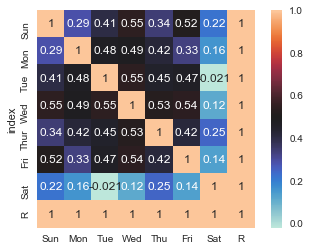

In [21]:
x = pd.DataFrame({"time": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
x = x.set_index("time")
x["Mon"] =  hour["March 13"]
x["Tue"] =  hour["March 14"]
x["Wed"] =  hour["March 15"]
x["Thu"] =  hour["March 16"]
x["Fri"] =  hour["March 17"]
x["Sat"] =  hour["March 18"]
x["Sun"] =  hour["March 12"]
r = [[1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,0,1],
    [0,0,1,0,0,0,0,1],
    [0,0,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,1],
    [1,1,1,1,1,1,1,1]]
#Sun - Mon
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Mon'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][1] = r[1][0] = r_value
#sns.lmplot(x="Sun", y="Mon", data=x)
#ax = hour.plot(y = ["March 12", "March 13"])
#Sun - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][2] = r[2][0] = r_value
#sns.lmplot(x="Sun", y="Tue", data=x)
#ax = hour.plot(y = ["March 12", "March 14"])
#Sun - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][3] = r[3][0] = r_value
#sns.lmplot(x="Sun", y="Wed", data=x)
#ax = hour.plot(y = ["March 12", "March 15"])
#Sun - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][4] = r[4][0] = r_value
#sns.lmplot(x="Sun", y="Thu", data=x)
#ax = hour.plot(y = ["March 12", "March 16"])
#Sun - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][5] = r[5][0] = r_value
#sns.lmplot(x="Sun", y="Fri", data=x)
#ax = hour.plot(y = ["March 12", "March 17"])
#Sun - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][6] = r[6][0] = r_value
#sns.lmplot(x="Sun", y="Sat", data=x)
#ax = hour.plot(y = ["March 12", "March 1"])

#Mon - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][2] = r[2][1] = r_value
#sns.lmplot(x="Mon", y="Tue", data=x)
#Mon - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][3] = r[3][1] = r_value
#sns.lmplot(x="Mon", y="Wed", data=x)
#Mon - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][4] = r[4][1] = r_value
#sns.lmplot(x="Mon", y="Thu", data=x)
#Mon - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][5] = r[5][1] = r_value
#sns.lmplot(x="Mon", y="Fri", data=x)
#Mon - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][6] = r[6][1] = r_value
#sns.lmplot(x="Mon", y="Sat", data=x)

#Tue - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][3] = r[3][2] = r_value
#sns.lmplot(x="Tue", y="Wed", data=x)
#Tue - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][4] = r[4][2] = r_value
#sns.lmplot(x="Tue", y="Thu", data=x)
#Tue - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][5] = r[5][2] = r_value
#sns.lmplot(x="Tue", y="Fri", data=x)
#Tue - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][6] = r[6][2] = r_value
#sns.lmplot(x="Tue", y="Sat", data=x)

#Wed - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][4] = r[4][3] = r_value
#sns.lmplot(x="Wed", y="Thu", data=x)
#Wed - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][5] = r[5][3] = r_value
#sns.lmplot(x="Wed", y="Fri", data=x)
#Wed - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][6] = r[6][3] = r_value
#sns.lmplot(x="Wed", y="Sat", data=x)

#Thu - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][5] = r[5][4] = r_value
#sns.lmplot(x="Thu", y="Fri", data=x)
#Thu - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][6] = r[6][4] = r_value
#sns.lmplot(x="Thu", y="Sat", data=x)

#Fri - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Fri'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[5][6] = r[6][5] = r_value
#sns.lmplot(x="Fri", y="Sat", data=x)

print(r)
heat = pd.DataFrame({"index": ["Sun","Mon","Tue","Wed","Thur","Fri","Sat","R"], "Sun":r[0]
                    , "Mon":r[1]
                    , "Tue":r[2]
                    , "Wed":r[3]
                    , "Thu":r[4]
                    , "Fri":r[5]
                    , "Sat":r[6]
                    , "R":r[7]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
#f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(10,10))
print('March 12-18')
ax = sns.heatmap(heat, square = True, center = .5,annot = True) #ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"},

[[1, 0.4788238618836051, 0.3244720861094582, 0.45259302176269844, 0.39998532837425854, 0.427140562312956, 0.42190905607167095, 1], [0.4788238618836051, 1, 0.5927050092819887, 0.41580220240401333, 0.5521261289126237, 0.6600182690074664, 0.24238178182491157, 1], [0.3244720861094582, 0.5927050092819887, 1, 0.6067505672999636, 0.7457995655331673, 0.6242334536954995, 0.13115497428535286, 1], [0.45259302176269844, 0.41580220240401333, 0.6067505672999636, 1, 0.476910159100818, 0.5083601213046504, 0.21134968796964632, 1], [0.39998532837425854, 0.5521261289126237, 0.7457995655331673, 0.476910159100818, 1, 0.6623168525485174, 0.2021383536369346, 1], [0.427140562312956, 0.6600182690074664, 0.6242334536954995, 0.5083601213046504, 0.6623168525485174, 1, 0.4559418540412246, 1], [0.42190905607167095, 0.24238178182491157, 0.13115497428535286, 0.21134968796964632, 0.2021383536369346, 0.4559418540412246, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]
March 19-25


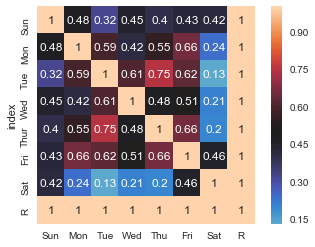

In [22]:
x = pd.DataFrame({"time": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
x = x.set_index("time")
x["Mon"] =  hour["March 20"]
x["Tue"] =  hour["March 21"]
x["Wed"] =  hour["March 22"]
x["Thu"] =  hour["March 23"]
x["Fri"] =  hour["March 24"]
x["Sat"] =  hour["March 25"]
x["Sun"] =  hour["March 19"]
r = [[1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,0,1],
    [0,0,1,0,0,0,0,1],
    [0,0,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,1],
    [1,1,1,1,1,1,1,1]]
#Sun - Mon
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Mon'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][1] = r[1][0] = r_value
#sns.lmplot(x="Sun", y="Mon", data=x)
#ax = hour.plot(y = ["March 12", "March 13"])
#Sun - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][2] = r[2][0] = r_value
#sns.lmplot(x="Sun", y="Tue", data=x)
#ax = hour.plot(y = ["March 12", "March 14"])
#Sun - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][3] = r[3][0] = r_value
#sns.lmplot(x="Sun", y="Wed", data=x)
#ax = hour.plot(y = ["March 12", "March 15"])
#Sun - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][4] = r[4][0] = r_value
#sns.lmplot(x="Sun", y="Thu", data=x)
#ax = hour.plot(y = ["March 12", "March 16"])
#Sun - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][5] = r[5][0] = r_value
#sns.lmplot(x="Sun", y="Fri", data=x)
#ax = hour.plot(y = ["March 12", "March 17"])
#Sun - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][6] = r[6][0] = r_value
#sns.lmplot(x="Sun", y="Sat", data=x)
#ax = hour.plot(y = ["March 12", "March 1"])

#Mon - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][2] = r[2][1] = r_value
#sns.lmplot(x="Mon", y="Tue", data=x)
#Mon - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][3] = r[3][1] = r_value
#sns.lmplot(x="Mon", y="Wed", data=x)
#Mon - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][4] = r[4][1] = r_value
#sns.lmplot(x="Mon", y="Thu", data=x)
#Mon - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][5] = r[5][1] = r_value
#sns.lmplot(x="Mon", y="Fri", data=x)
#Mon - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][6] = r[6][1] = r_value
#sns.lmplot(x="Mon", y="Sat", data=x)

#Tue - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][3] = r[3][2] = r_value
#sns.lmplot(x="Tue", y="Wed", data=x)
#Tue - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][4] = r[4][2] = r_value
#sns.lmplot(x="Tue", y="Thu", data=x)
#Tue - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][5] = r[5][2] = r_value
#sns.lmplot(x="Tue", y="Fri", data=x)
#Tue - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][6] = r[6][2] = r_value
#sns.lmplot(x="Tue", y="Sat", data=x)

#Wed - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][4] = r[4][3] = r_value
#sns.lmplot(x="Wed", y="Thu", data=x)
#Wed - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][5] = r[5][3] = r_value
#sns.lmplot(x="Wed", y="Fri", data=x)
#Wed - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][6] = r[6][3] = r_value
#sns.lmplot(x="Wed", y="Sat", data=x)

#Thu - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][5] = r[5][4] = r_value
#sns.lmplot(x="Thu", y="Fri", data=x)
#Thu - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][6] = r[6][4] = r_value
#sns.lmplot(x="Thu", y="Sat", data=x)

#Fri - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Fri'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[5][6] = r[6][5] = r_value
#sns.lmplot(x="Fri", y="Sat", data=x)

print(r)
heat = pd.DataFrame({"index": ["Sun","Mon","Tue","Wed","Thur","Fri","Sat","R"], "Sun":r[0]
                    , "Mon":r[1]
                    , "Tue":r[2]
                    , "Wed":r[3]
                    , "Thu":r[4]
                    , "Fri":r[5]
                    , "Sat":r[6]
                    , "R":r[7]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
#f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(10,10))

print('March 19-25')
ax = sns.heatmap(heat, square = True, center = .5,annot = True) #ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"},

In [23]:
import statsmodels.tsa.stattools as sm

In [24]:
print(hour)
ugh = list(hour["March 12"])
print(ugh)

      March 12  March 13  March 14  March 15  March 16  March 17  March 18  \
time                                                                         
0            8         7         2         3        10         6        21   
1            4         5         0         1         7         9        15   
2            0         2         3         3         3         5        14   
3            6         4         1         1         0         2         9   
4            6         0         1         0         2         5         1   
5            0         0         0         0         2         5         0   
6            0         1         1         2         0         0         1   
7            1         2         0         1         5         3         0   
8            0         6         3         1         3         1         4   
9            2         9         6         3         9         2         5   
10           3        12         2         5         6         8

In [57]:
x = np.column_stack((list(hour["March 12"]),list(hour["March 13"])))
#print(x)
sm.grangercausalitytests(x = x,maxlag = 6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1059  , p=0.1622  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=2.4218  , p=0.1197  , df=1
likelihood ratio test: chi2=2.3026  , p=0.1292  , df=1
parameter F test:         F=2.1059  , p=0.1622  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5517  , p=0.1074  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=6.6043  , p=0.0368  , df=2
likelihood ratio test: chi2=5.7753  , p=0.0557  , df=2
parameter F test:         F=2.5517  , p=0.1074  , df_denom=17, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.6773  , p=0.0050  , df_denom=14, df_num=3
ssr based chi2 test:   chi2=30.0477 , p=0.0000  , df=3
likelihood ratio test: chi2=18.6530 , p=0.0003  , df=3
parameter F test:         F=6.6773  , p=0.0050  , df_denom=14, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5934  , p=0.0415  , df_d

{1: ({'ssr_ftest': (2.1058701554021155, 0.16224021832846486, 20.0, 1),
   'ssr_chi2test': (2.4217506787124328, 0.11966113417777145, 1),
   'lrtest': (2.302551104593647, 0.1291617044777117, 1),
   'params_ftest': (2.1058701554021066, 0.16224021832846566, 20.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.551667016200419, 0.10738030738388513, 17.0, 2),
   'ssr_chi2test': (6.60431463016579, 0.036803684553499645, 2),
   'lrtest': (5.775332514241256, 0.055706064663643584, 2),
   'params_ftest': (2.5516670162004162, 0.10738030738388539, 17.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.677260610412997, 0.005009161627997759, 14.0, 3),
   'ssr_chi2test': (30.047672746858485, 1.3485556434162144e-06, 3),
   'lrtest': (18.652987880675497, 0.00032249006526596216, 3),
   'params_ftest': (6.677260610412984, 0.005009161627997794, 14.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [58]:
x = np.column_stack((list(hour["March 13"]),list(hour["March 12"])))
#print(x)
sm.grangercausalitytests(x = x,maxlag = 6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6217  , p=0.2175  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=1.8650  , p=0.1721  , df=1
likelihood ratio test: chi2=1.7932  , p=0.1805  , df=1
parameter F test:         F=1.6217  , p=0.2175  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5315  , p=0.2446  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=3.9640  , p=0.1378  , df=2
likelihood ratio test: chi2=3.6447  , p=0.1616  , df=2
parameter F test:         F=1.5315  , p=0.2446  , df_denom=17, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4890  , p=0.2606  , df_denom=14, df_num=3
ssr based chi2 test:   chi2=6.7007  , p=0.0821  , df=3
likelihood ratio test: chi2=5.8157  , p=0.1209  , df=3
parameter F test:         F=1.4890  , p=0.2606  , df_denom=14, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6037  , p=0.2418  , df_d

{1: ({'ssr_ftest': (1.6217231453419974, 0.2174540757561988, 20.0, 1),
   'ssr_chi2test': (1.864981617143297, 0.1720509495394585, 1),
   'lrtest': (1.7932234494073782, 0.18053391055947776, 1),
   'params_ftest': (1.6217231453420042, 0.21745407575619805, 20.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.531526336613112, 0.2445914199436066, 17.0, 2),
   'ssr_chi2test': (3.96395051829276, 0.1377967839586335, 2),
   'lrtest': (3.6446652886540676, 0.16164824295223298, 2),
   'params_ftest': (1.5315263366131113, 0.2445914199436066, 17.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4890485089271133, 0.2605574098633324, 14.0, 3),
   'ssr_chi2test': (6.70071829017201, 0.08207404037836213, 3),
   'lrtest': (5.815654029922953, 0.1209317409085974, 3),
   'params_ftest': (1.4890485089271162, 0.26055740986333176, 14.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 

In [120]:
def optimal_lag(list1, list2):
    x = list(list1)
    y = list(list2)
    #/* Calculate the mean of the two series x[], y[] */
    mx = np.mean(x)
    my = np.mean(y)

    n = 23
    #/* Calculate the denominator */
    sx = 0;
    sy = 0;
    for i in range (0,n):
        sx += (x[i] - mx) * (x[i] - mx)
        sy += (y[i] - my) * (y[i] - my)
    denom = np.sqrt(sx*sy);

    #/* Calculate the correlation series */
    maxdelay = 6
    r = []
    index = []
    for delay in range (-maxdelay,maxdelay):
        sxy = 0;
        for i in range (0,n):
            j = i + delay
            if (j < 0 or j >= n) == False:
                sxy += (x[i] - mx) * (y[j] - my)
            #Or should it be (?)
            #if (j < 0 || j >= n)
                #sxy += (x[i] - mx) * (-my);
            #else
                #sxy += (x[i] - mx) * (y[j] - my);
        index.append(delay)
        r.append(sxy / denom)
        #/* r is the correlation coefficient at "delay" */
    mx = max(r)
    mn = min(r)
    if abs(mn) > abs (mx):
        return(index[r.index(mn)], mn)
    else:
        return(index[r.index(mx)], mx)
#     return(index[r.index(mx)], mx)

In [121]:
lag = [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,-6],
    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,-5],
    [0,0,1,0,0,0,0,0,1,0,0,0,0,0,-4],
    [0,0,0,1,0,0,0,0,1,0,0,0,0,0,-3],
    [0,0,0,0,1,0,0,0,1,0,0,0,0,0,-2],
    [0,0,0,0,0,1,0,0,1,0,0,0,0,0,-1],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,1],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,2],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,3],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,4],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,5],
    [-6,-5,-4,-3,-2,-1,0,0,0,1,2,3,4,5,6]]

r = [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,13/14],
    [0,0,1,0,0,0,0,0,1,0,0,0,0,0,12/14],
    [0,0,0,1,0,0,0,0,1,0,0,0,0,0,11/14],
    [0,0,0,0,1,0,0,0,1,0,0,0,0,0,10/14],
    [0,0,0,0,0,1,0,0,1,0,0,0,0,0,9/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,8/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,7/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,6/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,5/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,4/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,3/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,2/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,1/14],
    [1,13/14,12/14,11/14,10/14,9/14,8/14,7/14,6/14,5/14,4/14,3/14,2/14,1/14,0]]

days = ["March 12","March 13","March 14","March 15","March 16","March 17","March 18","March 19","March 20","March 21","March 22","March 23","March 24","March 25",]
for d in days:
    for d2 in days:
        i,m = optimal_lag(hour[d],hour[d2])
        lag[days.index(d)][days.index(d2)] = i
        r[days.index(d)][days.index(d2)] = m


March 12-18 - NEG R ALLOWED


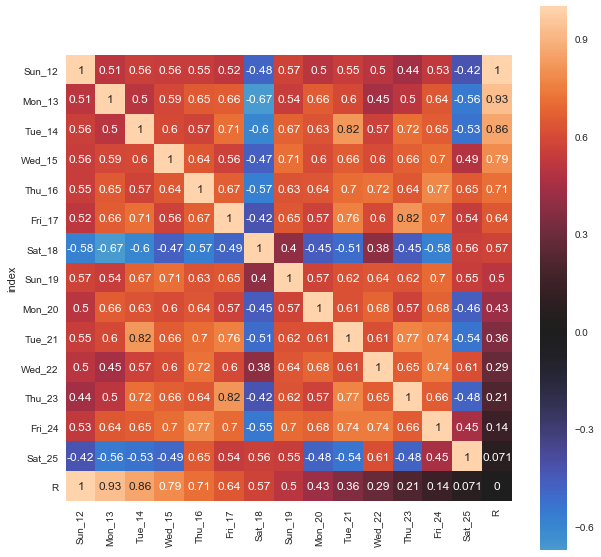

In [114]:
heat = pd.DataFrame({"index": ["Sun_12","Mon_13","Tue_14","Wed_15","Thu_16","Fri_17","Sat_18","Sun_19","Mon_20","Tue_21","Wed_22","Thu_23","Fri_24","Sat_25","R"], 
                     "Sun_12":r[0]
                    , "Mon_13":r[1]
                    , "Tue_14":r[2]
                    , "Wed_15":r[3]
                    , "Thu_16":r[4]
                    , "Fri_17":r[5]
                    , "Sat_18":r[6]
                    ,"Sun_19":r[7]
                    , "Mon_20":r[8]
                    , "Tue_21":r[9]
                    , "Wed_22":r[10]
                    , "Thu_23":r[11]
                    , "Fri_24":r[12]
                    , "Sat_25":r[13]
                    , "R":r[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('March 12-18 - NEG R ALLOWED')
ax = sns.heatmap(heat, square = True, center = 0,annot = True) 

March 12-18 - NEG R NOT ALLOWED


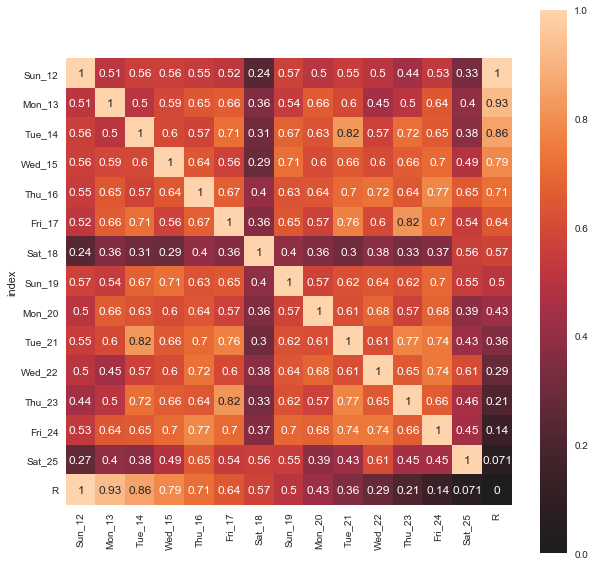

In [117]:
heat = pd.DataFrame({"index": ["Sun_12","Mon_13","Tue_14","Wed_15","Thu_16","Fri_17","Sat_18","Sun_19","Mon_20","Tue_21","Wed_22","Thu_23","Fri_24","Sat_25","R"], 
                     "Sun_12":r[0]
                    , "Mon_13":r[1]
                    , "Tue_14":r[2]
                    , "Wed_15":r[3]
                    , "Thu_16":r[4]
                    , "Fri_17":r[5]
                    , "Sat_18":r[6]
                    ,"Sun_19":r[7]
                    , "Mon_20":r[8]
                    , "Tue_21":r[9]
                    , "Wed_22":r[10]
                    , "Thu_23":r[11]
                    , "Fri_24":r[12]
                    , "Sat_25":r[13]
                    , "R":r[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('March 12-18 - NEG R NOT ALLOWED')
ax = sns.heatmap(heat, square = True, center = 0,annot = True) # no neg

March 12-18 - NEG R NOT ALLOWED


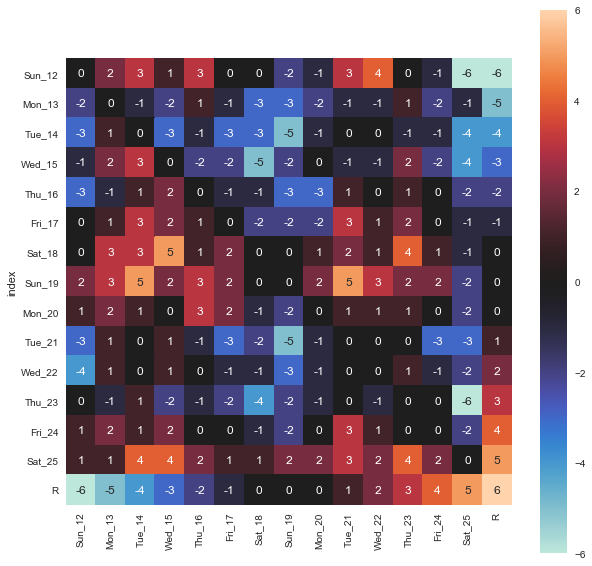

In [119]:
heat = pd.DataFrame({"index": ["Sun_12","Mon_13","Tue_14","Wed_15","Thu_16","Fri_17","Sat_18","Sun_19","Mon_20","Tue_21","Wed_22","Thu_23","Fri_24","Sat_25","R"], 
                     "Sun_12":lag[0]
                    , "Mon_13":lag[1]
                    , "Tue_14":lag[2]
                    , "Wed_15":lag[3]
                    , "Thu_16":lag[4]
                    , "Fri_17":lag[5]
                    , "Sat_18":lag[6]
                    ,"Sun_19":lag[7]
                    , "Mon_20":lag[8]
                    , "Tue_21":lag[9]
                    , "Wed_22":lag[10]
                    , "Thu_23":lag[11]
                    , "Fri_24":lag[12]
                    , "Sat_25":lag[13]
                    , "R":lag[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('March 12-18 - NEG R NOT ALLOWED')
ax = sns.heatmap(heat, square = True,annot = True,center = 0)

March 12-18 - NEG R ALLOWED


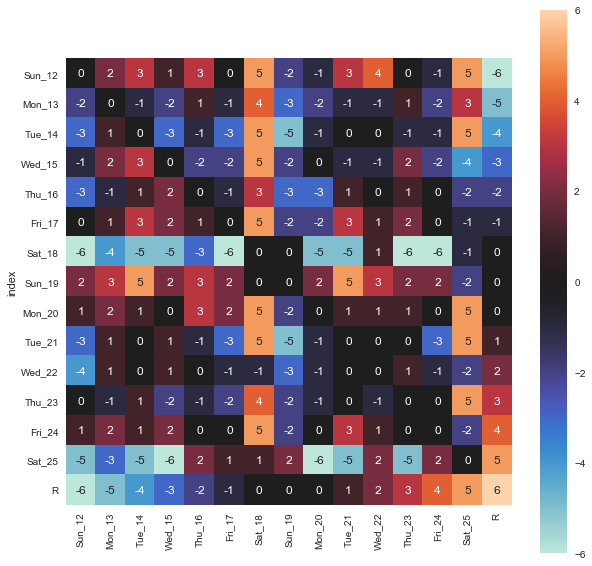

In [123]:
heat = pd.DataFrame({"index": ["Sun_12","Mon_13","Tue_14","Wed_15","Thu_16","Fri_17","Sat_18","Sun_19","Mon_20","Tue_21","Wed_22","Thu_23","Fri_24","Sat_25","R"], 
                     "Sun_12":lag[0]
                    , "Mon_13":lag[1]
                    , "Tue_14":lag[2]
                    , "Wed_15":lag[3]
                    , "Thu_16":lag[4]
                    , "Fri_17":lag[5]
                    , "Sat_18":lag[6]
                    ,"Sun_19":lag[7]
                    , "Mon_20":lag[8]
                    , "Tue_21":lag[9]
                    , "Wed_22":lag[10]
                    , "Thu_23":lag[11]
                    , "Fri_24":lag[12]
                    , "Sat_25":lag[13]
                    , "R":lag[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('March 12-18 - NEG R ALLOWED')
ax = sns.heatmap(heat, square = True,annot = True,center = 0)

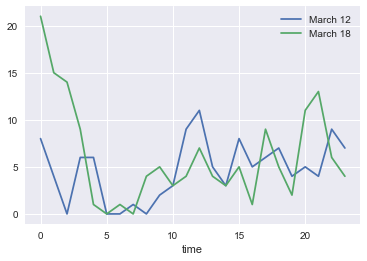

In [78]:
ax = hour.plot(y = ["March 12", "March 18"])

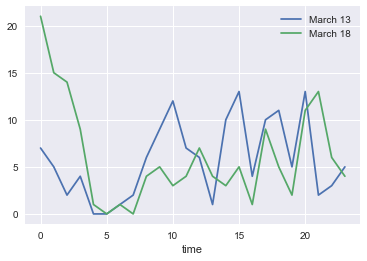

In [79]:
ax = hour.plot(y = ["March 13", "March 18"])